In [3]:
# 先导入keras库
from keras.datasets import cifar10
# 调用加载数据的函数加载数据
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


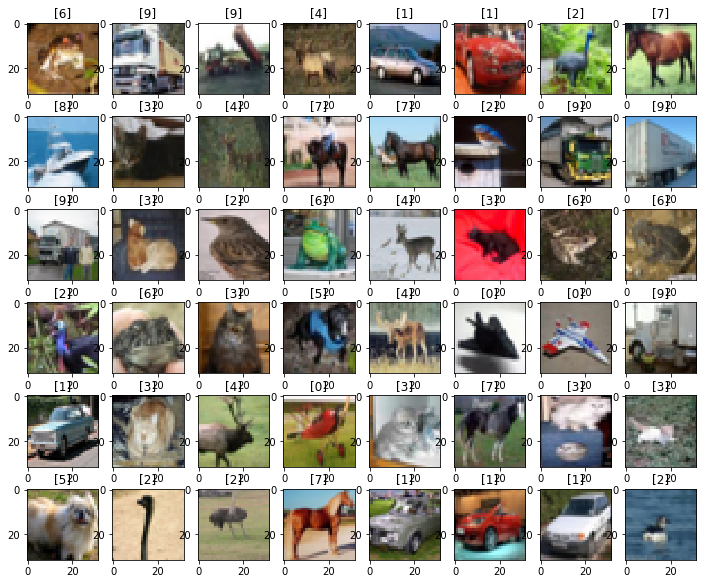

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
ii, jj = 8, 6
for i in range(ii*jj):  
    plt.subplot(jj, ii, i+1)
    plt.imshow(X_train[i],interpolation='nearest')
    plt.title(y_train[i])
plt.show()

In [5]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
#print(X_train[:,5,:])

In [6]:
from keras.utils import np_utils  
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print(Y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [7]:
from keras.models import Sequential  
from keras.layers import Dense,Activation,Flatten
from keras.layers import Conv2D, MaxPooling2D
model = Sequential()

In [8]:
model.add(Conv2D(64, (3, 3), input_shape=X_train.shape[1:]))

In [9]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [10]:
model.add(Conv2D(64, (3, 3)))

In [11]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [12]:
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 512)               1

In [14]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [15]:
model.fit(X_train, Y_train, batch_size=100, epochs=2)

Epoch 1/2
500/500 [==============================] - 46s 92ms/step - loss: 1.4641 - accuracy: 0.4860
Epoch 2/2
500/500 [==============================] - 48s 97ms/step - loss: 1.0219 - accuracy: 0.6461


In [16]:
score = model.evaluate(X_test, Y_test)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

313/313 [==============================] - 2s 6ms/step - loss: 1.0164 - accuracy: 0.6535
Test loss:  1.0164419412612915
Test accuracy:  0.6535000205039978
